<a href="https://colab.research.google.com/github/anishmahapatra/DataScienceInterviewPrep/blob/main/Revoult_KYC_Python_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revoult

- <b>Author:</b> Anish Mahapatra
- <b>Email:</b> anishmahapatra01@gmail.com

### Operations Task

The task to is help improve KYC. Expected KYC report to contain the following:
- Improve KYC / Presentation of findings
- Catching fraud report
- Supporting Materials

All customers that would like an account would need to be validated. There are 2 main checks to be performed:
- Document check
- Facial Similarity Check

Getting a KYC 'clear' implies that the customer has cleared Document and Facial similarity check.

<b>Document (clear) + Facial Similarity (clear) = KYC (clear) </b>

Each customer has two attempts. The pass rate has decreased substantially in the recent period. (Why?)



#### The questions we are trying to answer:
1. What is the percentage of people who are passing the document check?
2. What is the percentage of people who are passing the facial similarity?
    a. What are the % break-downs of the other results for facial similarity?
3. What is the percentage of people who are passing KYC (document check + facial similarity)?
4. Why has the pass rate decreased in the recent period?
5. What is the percentage of people with attempts more than one?
6. How many people are failing due the maximum number of attempts?
7. What is the root cause?
8. What are the possible solutions to the decrease in pass rate?


<a id='TOC'></a>

# Table Of Contents

Following are the steps to the followed to perform the analysis:

- [1 Data load & Quick EDA](#1)
    - [#1.1 Analysis of Document Check Data](#1.1)
    - [#1.2 Analysis of Facial Similarity Data](#1.2)
- [Join of Document Check & Facial Similarity](#2)

<a name="1"></a>
## 1 Data load, importing libraries & Sense Check of Data
Back to [Table of Contents](#0)

---


In [ ]:
# Installing the required packages

! pip uninstall -y pandas-profiling &> /dev/null                # Package for pandas profiling - visualization
! pip install pandas-profiling[notebook,html] &> /dev/null      # Uninstalling and reinstalling it due to a bug in Google Colab
! pip install sweetviz &> /dev/null                             # Package for some sweet visualizations
! pip install -U dataprep &> /dev/null                          # Package for instant data preparation
! pip install --upgrade plotly &> /dev/null                     # Updating plotly to the latest version
! pip install jupyter-dash &> /dev/null                         # Installing jupyter-dash 
! pip install pydotplus &> /dev/null                            # Visualization library
! pip install eli5 &> /dev/null
! pip install lime &> /dev/null
! pip3 install catboost &> /dev/null

In [ ]:
# Importing the required packages

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from pandas_profiling import ProfileReport          # Pandas Profile to visualize the data
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from IPython.display import display                 # Displaying widgets

from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas_profiling                             # Automatic EDA
import sweetviz as sv                               # Importing sweetviz for some sweet visualizations
import seaborn as sns
import pandas as pd
import numpy as np
import IPython                                      # Importing ipython for displaying html files in the notebook

import os

# Hide warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the file onto Google Colab from GitHub using pandas library
documentDf = pd.read_csv("https://raw.githubusercontent.com/anishmahapatra/DataScienceInterviewPrep/main/Revoult%20Interview/doc_reports.csv")

In [ ]:
# Reading the file onto Google Colab from GitHub using pandas library
faceDf = pd.read_csv("https://raw.githubusercontent.com/anishmahapatra/DataScienceInterviewPrep/main/Revoult%20Interview/facial_similarity_reports.csv")

<a name="1.1"></a>
### 1.1 Analysis of Document Check Data
Back to [Table of Contents](#0)

In [ ]:
df = documentDf.copy(deep = True)
# Viewing the head of the data
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
user_id,ab23fae164e34af0a1ad1423ce9fd9f0,15a84e8951254011b47412fa4e8f65b8,ffb82fda52b041e4b9af9cb4ef298c85,bd4a8b3e3601427e88aa1d9eab9f4290,f52ad1c7e69543a9940c3e7f8ed28a39
result,consider,clear,clear,clear,clear
visual_authenticity_result,consider,clear,clear,clear,clear
image_integrity_result,clear,clear,clear,clear,clear
face_detection_result,clear,clear,clear,clear,clear
image_quality_result,clear,clear,clear,clear,clear
created_at,2017-06-20T23:12:57Z,2017-06-20T23:16:04Z,2017-06-20T17:59:49Z,2017-06-20T17:59:38Z,2017-06-20T18:08:09Z
supported_document_result,clear,clear,clear,clear,clear
conclusive_document_quality_result,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(176404, 19)

In [ ]:
# Let's view a summary of the dataset now
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          176404 non-null  int64 
 1   user_id                             176404 non-null  object
 2   result                              176404 non-null  object
 3   visual_authenticity_result          150290 non-null  object
 4   image_integrity_result              176403 non-null  object
 5   face_detection_result               150261 non-null  object
 6   image_quality_result                176403 non-null  object
 7   created_at                          176404 non-null  object
 8   supported_document_result           175900 non-null  object
 9   conclusive_document_quality_result  95217 non-null   object
 10  colour_picture_result               95222 non-null   object
 11  data_validation_result              142

#### Pandas Profiling - Document Check Data

In [ ]:
# Generating the profile report and feeding it into a variable
Profile = ProfileReport(df, title = 'Document Check Data: Pandas Profiling Report', html = {'style':{'full_width':True}})

In [ ]:
# Showcasing the Pandas Profiling Report for the Zomato Dataset
Profile.to_file(output_file="Document_Check_report.html")
# Profile

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### SweetViz - Document Check Data

In [ ]:
# We shall use the SweetViz analyze() function to generate a shareable .html file to analyze the dataset
sweetvizReport = sv.analyze(df)
sweetvizReport.show_html('SweetViz.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report SweetViz.html was generated.


In [ ]:
# We shall use the SweetViz analyze() function to generate a shareable .html file to analyze the dataset
sweetvizReport = sv.analyze(df)
# sweetvizReport.show_html('SweetViz.html')

                                             |          | [  0%]   00:00 -> (? left)


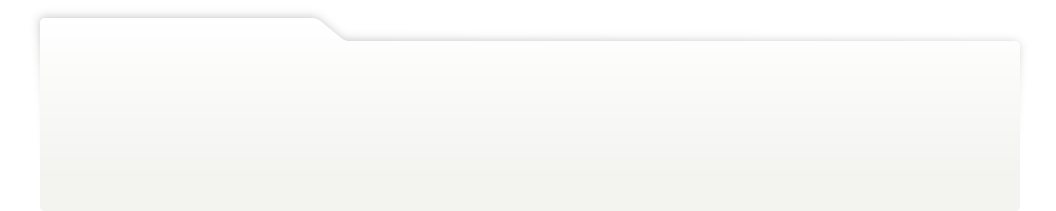
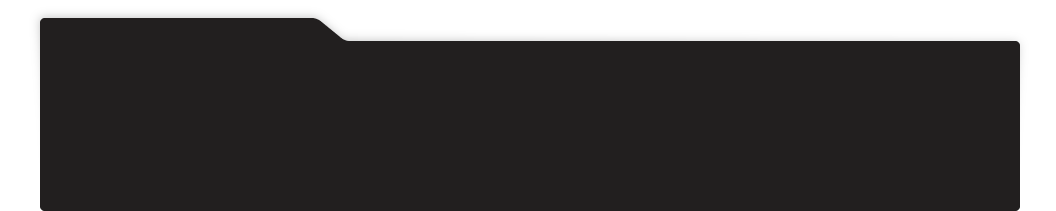
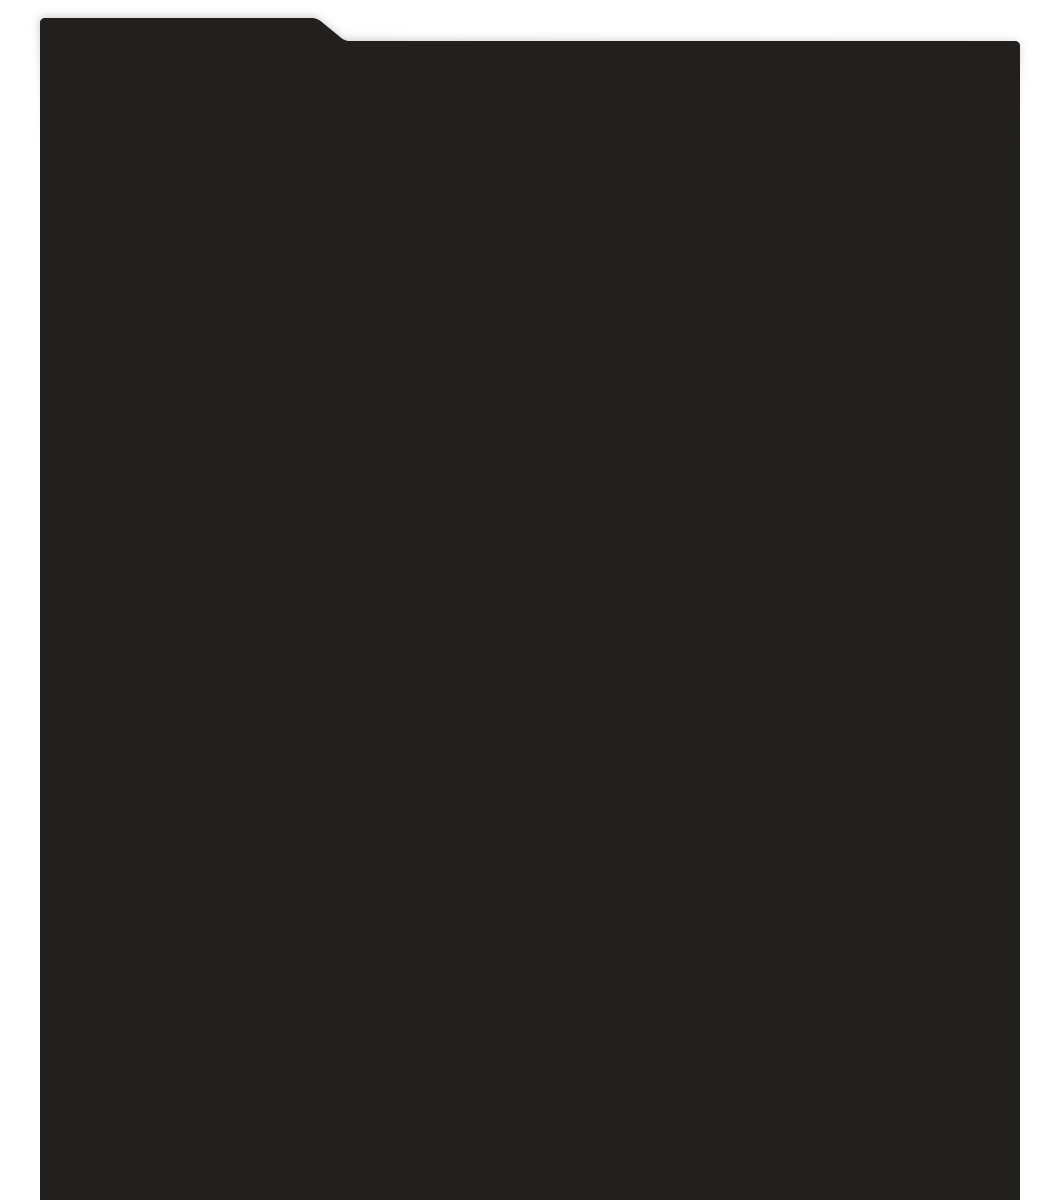
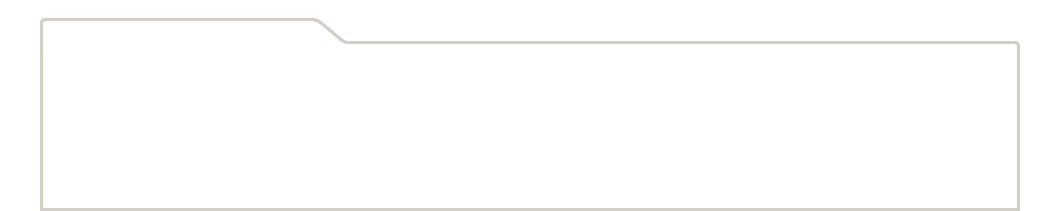
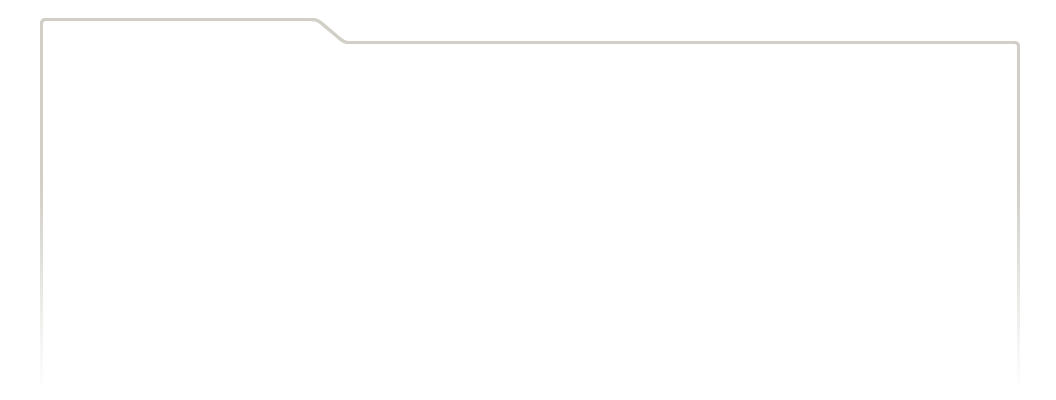
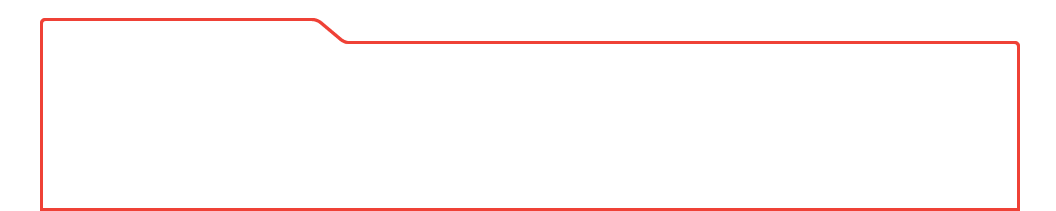
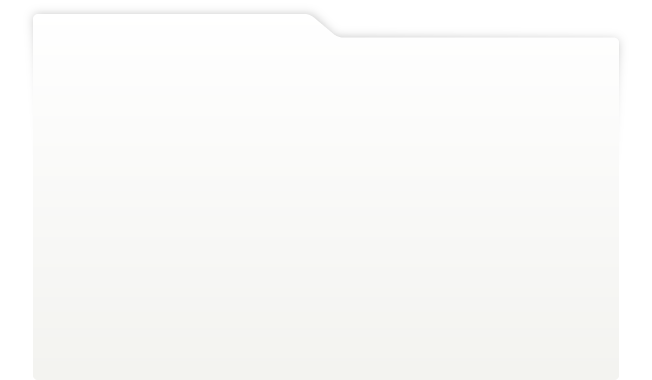
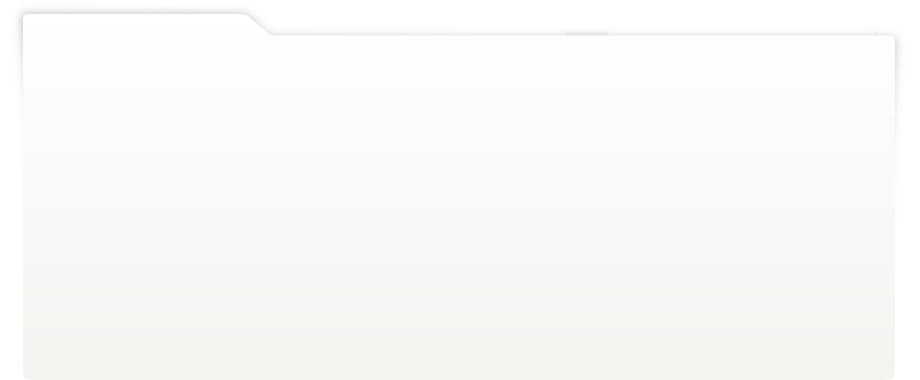
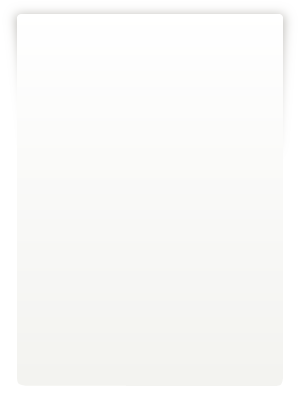
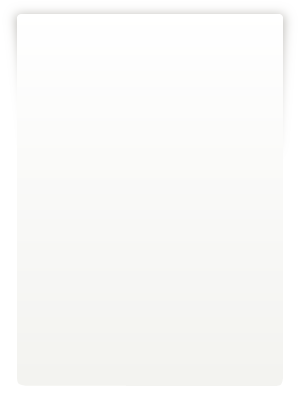
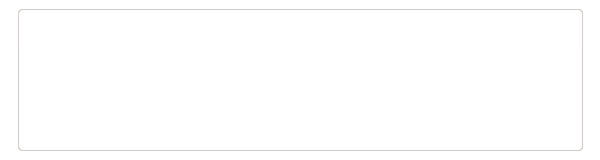
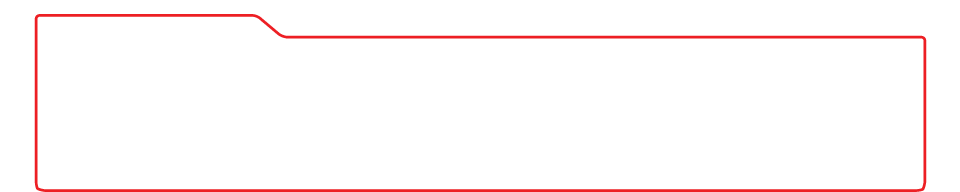
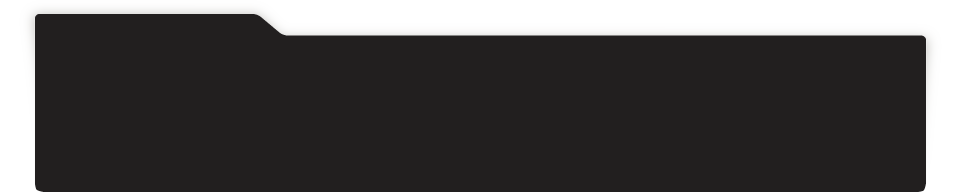
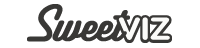
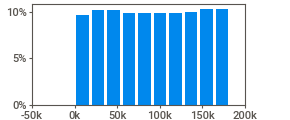
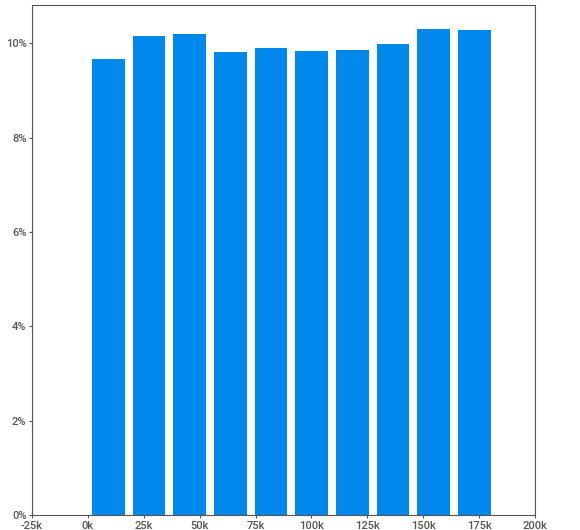
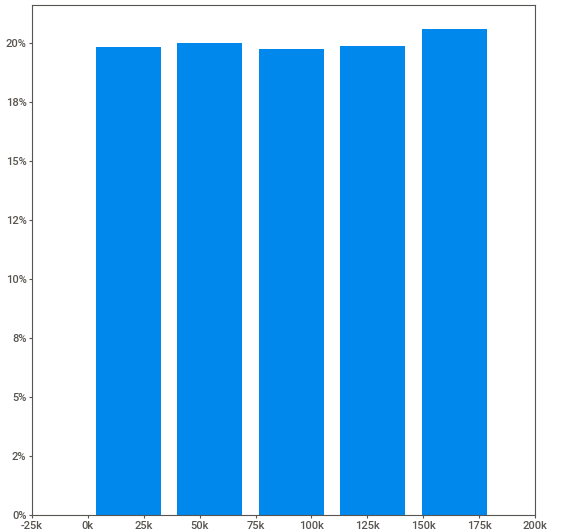
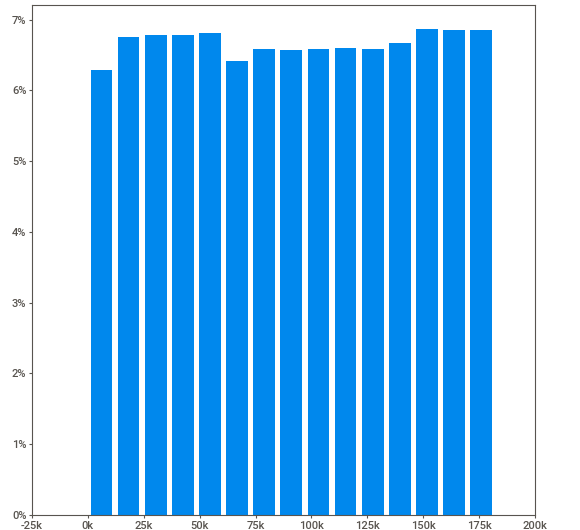
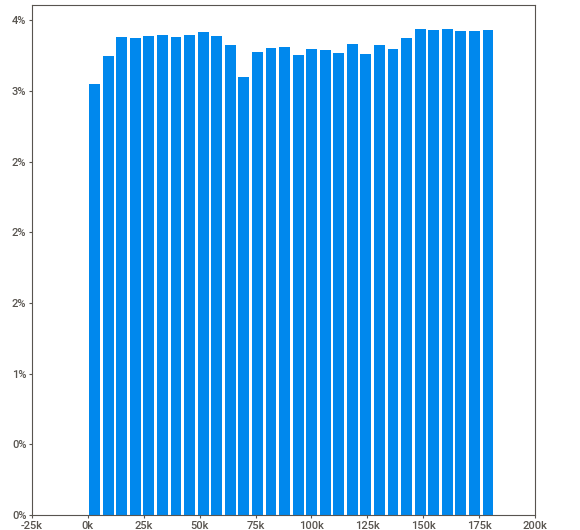
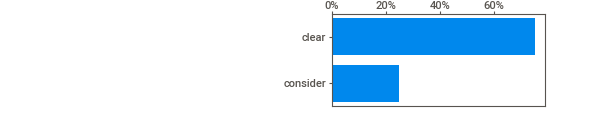
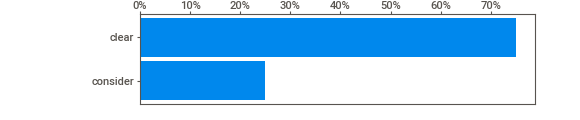
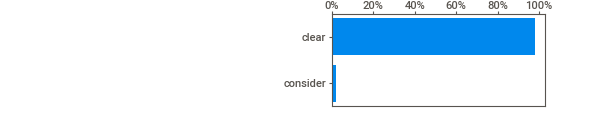
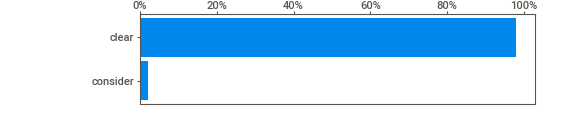
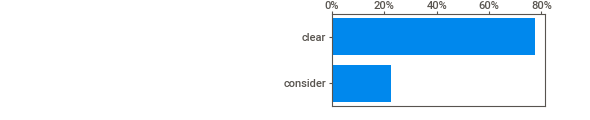
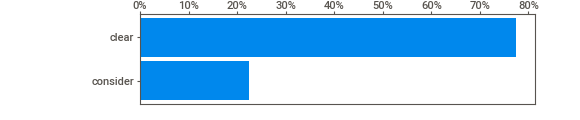
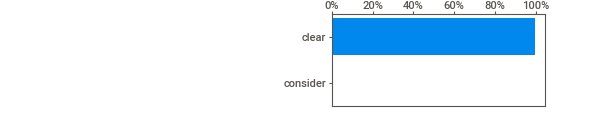
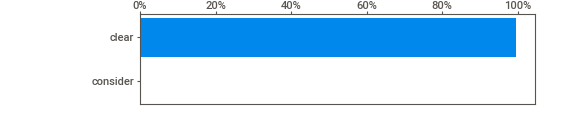
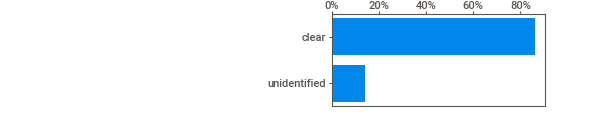
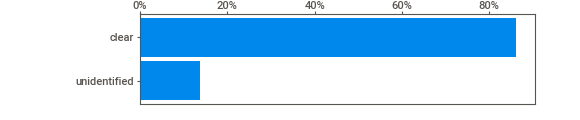
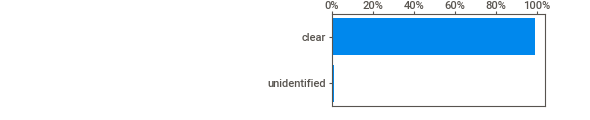
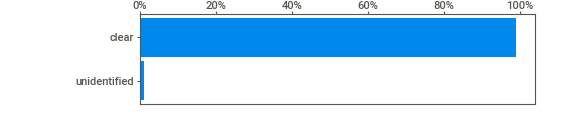
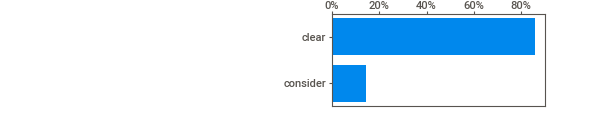
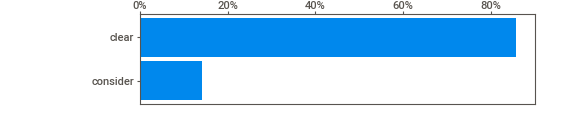
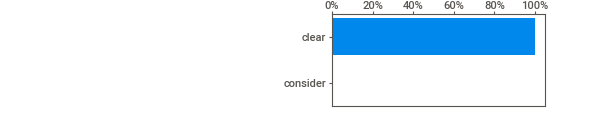
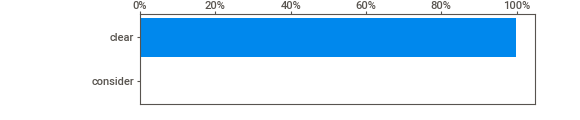
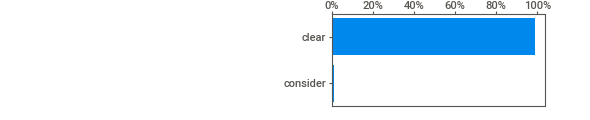
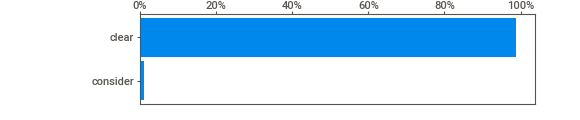
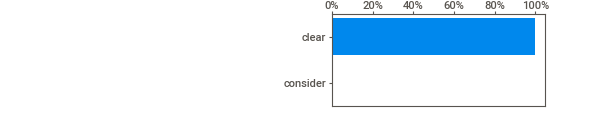
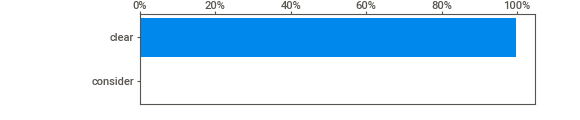
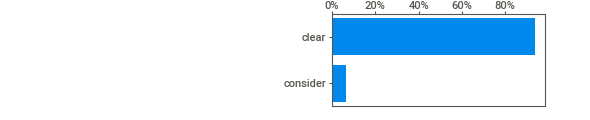
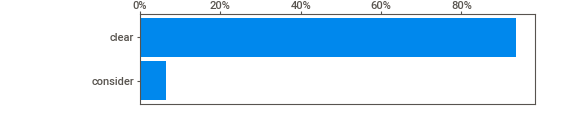
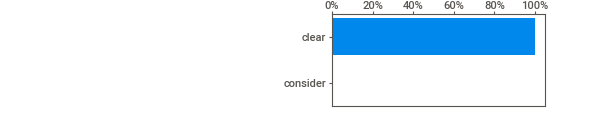
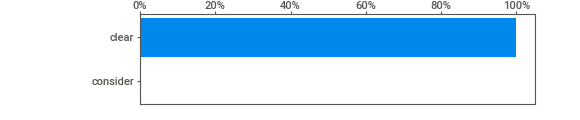
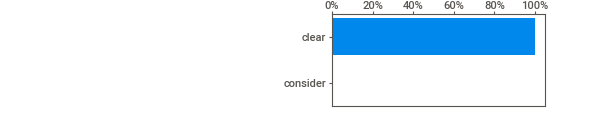
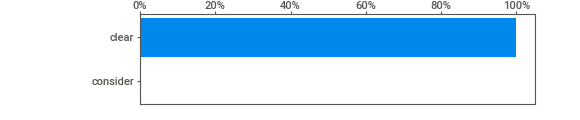
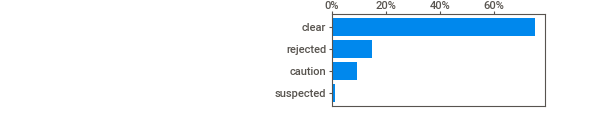
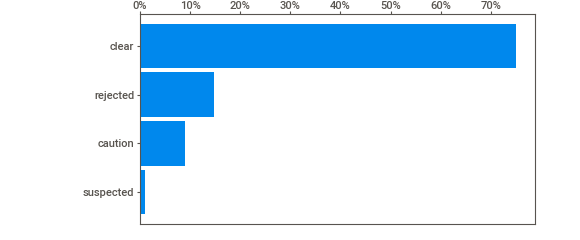
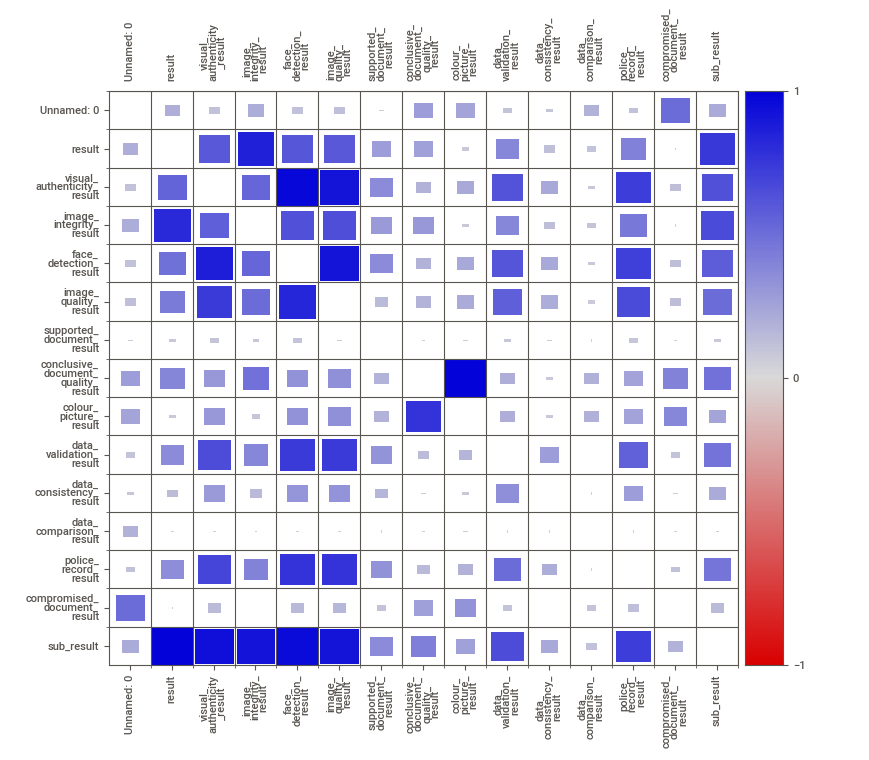
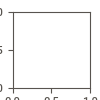

In [ ]:
# Displaying the html file in the Google Colab notebook
IPython.display.HTML('SweetViz.html')

<a name="1.2"></a>
### 1.2 Analysis of Facial Similarity Data
Back to [Table of Contents](#0)

In [ ]:
df = faceDf.copy(deep = True)
# Viewing the head of the data
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
user_id,ab23fae164e34af0a1ad1423ce9fd9f0,15a84e8951254011b47412fa4e8f65b8,ffb82fda52b041e4b9af9cb4ef298c85,bd4a8b3e3601427e88aa1d9eab9f4290,f52ad1c7e69543a9940c3e7f8ed28a39
result,clear,clear,clear,clear,clear
face_comparison_result,clear,clear,clear,clear,clear
created_at,2017-06-20T23:12:58Z,2017-06-20T23:16:04Z,2017-06-20T17:59:49Z,2017-06-20T17:59:39Z,2017-06-20T18:08:09Z
facial_image_integrity_result,clear,clear,clear,clear,clear
visual_authenticity_result,consider,clear,clear,clear,clear
properties,{},{},{},{},{}
attempt_id,050a0596de424fab83c433eaa18b3f8d,f69c1e5f45a64e50a26740b9bfb978b7,f9f84f3055714d8e8f7419dc984d1769,10a54a1ecf794404be959e030f11fef6,1f320d1d07de493292b7e0d5ebfb1cb9


In [ ]:
df.shape

(176404, 9)

In [ ]:
# Let's view a summary of the dataset now
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Unnamed: 0                     176404 non-null  int64 
 1   user_id                        176404 non-null  object
 2   result                         176403 non-null  object
 3   face_comparison_result         166007 non-null  object
 4   created_at                     176404 non-null  object
 5   facial_image_integrity_result  175941 non-null  object
 6   visual_authenticity_result     150290 non-null  object
 7   properties                     176404 non-null  object
 8   attempt_id                     176404 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.1+ MB
None


#### Pandas Profiling - Face Similarity Data

In [ ]:
# Generating the profile report and feeding it into a variable
Profile = ProfileReport(df, title = 'Face SImilarity Data: Pandas Profiling Report', html = {'style':{'full_width':True}})

In [ ]:
# Showcasing the Pandas Profiling Report for the Zomato Dataset
Profile.to_file(output_file="Face_Similarity_report.html")
# Profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### SweetViz - Face Similarity Data

In [ ]:
# We shall use the SweetViz analyze() function to generate a shareable .html file to analyze the dataset
sweetvizReport = sv.analyze(df)
# sweetvizReport.show_html('FaceSimilaritySweetViz.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
# We shall use the SweetViz analyze() function to generate a shareable .html file to analyze the dataset
sweetvizReport = sv.analyze(df)
# sweetvizReport.show_html('FaceSimilarity.html')

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
# Displaying the html file in the Google Colab notebook
IPython.display.HTML('FaceSimilarity.html')

<a name="2"></a>
## 2 Join
Back to [Table of Contents](#0)

---


In [ ]:
df1 = documentDf.copy(deep = True)
df2 = faceDf.copy(deep = True)

In [ ]:
dfMerge = df1.merge(df2, how='left', on=['attempt_id', 'user_id'], suffixes=('_doc', '_face'))

In [ ]:
df = dfMerge.copy(deep = True)

In [ ]:
df.shape

(176404, 26)

In [ ]:
df.head().T

,0,1,2,3,4
Unnamed: 0_doc,0,1,2,3,4
user_id,ab23fae164e34af0a1ad1423ce9fd9f0,15a84e8951254011b47412fa4e8f65b8,ffb82fda52b041e4b9af9cb4ef298c85,bd4a8b3e3601427e88aa1d9eab9f4290,f52ad1c7e69543a9940c3e7f8ed28a39
result_doc,consider,clear,clear,clear,clear
visual_authenticity_result_doc,consider,clear,clear,clear,clear
image_integrity_result,clear,clear,clear,clear,clear
face_detection_result,clear,clear,clear,clear,clear
image_quality_result,clear,clear,clear,clear,clear
created_at_doc,2017-06-20T23:12:57Z,2017-06-20T23:16:04Z,2017-06-20T17:59:49Z,2017-06-20T17:59:38Z,2017-06-20T18:08:09Z
supported_document_result,clear,clear,clear,clear,clear
conclusive_document_quality_result,NaN,NaN,NaN,NaN,NaN


SELECT user_id, count(attempt_id) as cnt
from df
having cnt > 2

In [ ]:
df = df.drop(['Unnamed: 0_doc', 'Unnamed: 0_face'], axis=1)

In [ ]:
df[df.groupby(['user_id'])['attempt_id'].transform('count') > 2]

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties_doc,sub_result,result_face,face_comparison_result,created_at_face,facial_image_integrity_result,visual_authenticity_result_face,properties_face
24,7e66b2c14ea74d28af5547be220455dd,clear,clear,clear,clear,clear,2017-06-20T19:39:10Z,clear,NaN,NaN,clear,NaN,NaN,e3549a16f4054976a7a994f1b268d195,NaN,NaN,"{'document_type': 'driving_licence', 'issuing_...",clear,clear,clear,2017-06-20T19:39:10Z,clear,clear,{}
198,efc249ccdd11480688963cdd719a0ab6,consider,consider,clear,clear,clear,2017-06-19T13:19:35Z,clear,NaN,NaN,clear,clear,NaN,9615852d27e2466584518ac5b93df049,clear,NaN,"{'gender': 'Male', 'issuing_date': '2011-01', ...",caution,consider,NaN,2017-06-19T13:19:35Z,consider,consider,{}
199,efc249ccdd11480688963cdd719a0ab6,clear,clear,clear,clear,clear,2017-06-19T13:29:45Z,clear,NaN,NaN,clear,clear,NaN,c91a8f2f191646c6b8c8540a85695542,clear,NaN,"{'gender': 'Male', 'issuing_date': '2011-01', ...",clear,clear,clear,2017-06-19T13:29:45Z,clear,clear,{}
200,efc249ccdd11480688963cdd719a0ab6,consider,consider,clear,clear,clear,2017-06-19T13:37:22Z,clear,NaN,NaN,clear,clear,NaN,f8d54fa3b24345188ac2e4d88e54d38d,clear,NaN,"{'gender': 'Male', 'issuing_date': '2011-01', ...",caution,clear,clear,2017-06-19T13:37:22Z,clear,consider,{}
205,aaa9c490e9594273b806a4083af06520,clear,clear,clear,clear,clear,2017-06-19T14:08:53Z,clear,NaN,NaN,clear,clear,NaN,9af26a6426a44315802b8009ac806a3c,clear,NaN,"{'gender': 'Male', 'nationality': 'UKR', 'docu...",clear,clear,clear,2017-06-19T14:08:53Z,clear,clear,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176234,86c1949045e74f568f9f7d2e967f688f,clear,clear,clear,clear,clear,2017-06-21T20:43:04Z,clear,NaN,NaN,clear,clear,NaN,c798892cefc2482e8445b62e3593a907,clear,NaN,"{'gender': 'Female', 'nationality': 'BRA', 'do...",clear,clear,clear,2017-06-21T20:43:04Z,clear,clear,{}
176236,86c1949045e74f568f9f7d2e967f688f,clear,clear,clear,clear,clear,2017-06-21T20:52:39Z,clear,NaN,NaN,clear,clear,NaN,466fbbd899c042c9abbd7e8db4f648cc,clear,NaN,"{'gender': 'Female', 'nationality': 'BRA', 'do...",clear,clear,clear,2017-06-21T20:52:39Z,clear,clear,{}
176253,3ec09c7b6ab04c3491be42b30c97d19a,clear,clear,clear,clear,clear,2017-06-21T16:07:41Z,clear,NaN,NaN,clear,clear,NaN,c0469758eaac409d8eba5c71cbb1b023,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,clear,clear,2017-06-21T16:07:41Z,clear,clear,{}
176254,3ec09c7b6ab04c3491be42b30c97d19a,clear,clear,clear,clear,clear,2017-06-21T16:13:58Z,clear,NaN,NaN,clear,clear,NaN,3d8fb40fcc7b4074a3581ed938e15e4d,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,clear,clear,2017-06-21T16:13:58Z,clear,clear,{}


There are 3,794 users that have multiple attempts.

In [ ]:
x = df.groupby(["user_id"]).size().reset_index(name='cnt')

In [ ]:
y = x.cnt>2

### Make new column -> kyc_status

In [ ]:
import pandas as pd

def alert(row):
  if row['result_doc'] == 'clear' and row['result_face'] == 'clear' :
    return 0
  else: # consider
    return 1


In [ ]:
df['kyc_status'] = df.apply(alert, axis=1)

In [ ]:
df.head()

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties_doc,sub_result,result_face,face_comparison_result,created_at_face,facial_image_integrity_result,visual_authenticity_result_face,properties_face,kyc_status
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},1
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},0
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},0
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},0
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},0


## Defining an accurate pass-rate

The approach we will use as follows:
- A: Retain the first attempt of all users and drop duplicates (as the columns are ordered by timestamp). 
- B: Then, we will look at the dataframe that have count > 2 and pick out the first one and de-duplicate this.

Combining A & B, we will get a clean dataset that we can identify pass rate from.


In [ ]:
df = dfMerge.copy(deep = True)
df = df.drop(['Unnamed: 0_doc', 'Unnamed: 0_face'], axis=1)

faceStatus = df["result_face"] == "clear"
docsStatus = df["result_doc"] == "clear"
df['kyc_status'] = faceStatus & docsStatus

In [ ]:
firstAttempt = df.drop_duplicates('user_id', False)
firstAttempt.shape

(110374, 25)

In [ ]:
# Gathering the dataframe where we record counts that are greater than number of acceptable counts (Two)
multipleUserAttempts = df['user_id'].value_counts()
multipleUserAttempts.head()  # some users had more than 2 attempts
multipleUserAttempts[multipleUserAttempts > 2].head()  # only 1232

6eeb7dbdf1fa4e7c95413bc0608dd21c    6
2df96cd3537d415a9e7f23f419197187    6
abe6afc009da4cb283bd5f270d8c5288    5
37942d5cef7f428381ba2d56eb9c0da6    5
3b0a8e16846b4d779c5ba9e5499391af    5
Name: user_id, dtype: int64

Now comes the tricky part, we need to invalidate and remove the columns if they have passed and only get the second attempt to see in case they are 'clear'.


So, essentially, we will have a dataframe with only second Attempts.

In [ ]:
# df of only multiple user attempts
dfMultipleAttempts = df[df.duplicated('user_id', keep=False)]

dfFirstAttempts = dfMultipleAttempts.drop_duplicates(
    'user_id', 'first')  # 1st attempt of these users
dfFinalAttempts = dfMultipleAttempts.drop_duplicates(
    'user_id', 'last')  # Final attempt of these users

# 5031 users passed their first attempt
usersPassedFirst = dfFirstAttempts[dfFirstAttempts["kyc_status"]]

In [ ]:
failFirstAttempt = dfFirstAttempts[dfFirstAttempts['kyc_status'] == False]
# df of multiple attempt users who failed 1st attempt
onlySecondAttempt = dfMultipleAttempts.groupby(
    ['user_id']).head(2).groupby(['user_id']).tail(1)
# df of only the 2nd attempt of multiple attempt users
firstAttempsOnly = df.drop_duplicates('user_id', 'first')
# df of only the 1st attempts of all user

In [ ]:
s1 = pd.concat([failFirstAttempt, onlySecondAttempt])
s1 = s1.drop_duplicates('user_id', 'last')
# keeping only 2nd attempt  of users, who had multiple attempts but failed the first
s2 = pd.concat([firstAttempsOnly, s1])
s2 = s2.drop_duplicates('user_id', 'last')
# Reorganising so have only 2nd attempt of users who had multiple attempts but failed the first
# and first attempt of all other users so an accurate pass rate can be caluclated
dfPassRate = s2.sort_values(["created_at_face"])
dfPassRate.reset_index(drop=True, inplace=True)

In [ ]:
print(round(len(df.drop_duplicates('user_id','first'))/len(df)*100,2) , '%') # ≈ 80% of attempts are not repeat attempts

80.91 %


## Visualization

In [ ]:
df.head().T

,0,1,2,3,4
user_id,ab23fae164e34af0a1ad1423ce9fd9f0,15a84e8951254011b47412fa4e8f65b8,ffb82fda52b041e4b9af9cb4ef298c85,bd4a8b3e3601427e88aa1d9eab9f4290,f52ad1c7e69543a9940c3e7f8ed28a39
result_doc,consider,clear,clear,clear,clear
visual_authenticity_result_doc,consider,clear,clear,clear,clear
image_integrity_result,clear,clear,clear,clear,clear
face_detection_result,clear,clear,clear,clear,clear
image_quality_result,clear,clear,clear,clear,clear
created_at_doc,2017-06-20T23:12:57Z,2017-06-20T23:16:04Z,2017-06-20T17:59:49Z,2017-06-20T17:59:38Z,2017-06-20T18:08:09Z
supported_document_result,clear,clear,clear,clear,clear
conclusive_document_quality_result,NaN,NaN,NaN,NaN,NaN
colour_picture_result,NaN,NaN,NaN,NaN,NaN


In [ ]:
# change format of dates so parsable with pandas
df["created_at_face"] = pd.to_datetime(df["created_at_face"])
df["created_at_doc"] = pd.to_datetime(df["created_at_doc"])

In [ ]:
# Investigate disparity of creation times of the Document and Facial Checks
creation_time_diff = df["created_at_face"] - df["created_at_doc"]
creation_time_diff = pd.Series([i.total_seconds() for i in creation_time_diff])
creation_time_diff.value_counts()

 0.0    167121
 1.0      5774
-1.0      3507
-4.0         1
dtype: int64

In [ ]:
# Order the dataframe in terms of time
df.sort_values(["created_at_face"], inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
# Create bins for each day which store the number of attempts that day
plt.rcParams['figure.figsize'] = (30, 15)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 22})

days_in_period = pd.date_range('2017-05-24', '2017-10-31', normalize=False)
day_bins = []
for k in range(len(days_in_period)-1):
    upper = df["created_at_doc"] < days_in_period[k+1]
    lower = df["created_at_doc"] > days_in_period[k]
    day_bins.append(len(df[upper & lower]))
plt.grid(b=True)
plt.plot(days_in_period[:-1], day_bins, 'ro')
plt.ylabel("Number of Attempts per Day", fontsize=30)
plt.xlabel("Time", fontsize=30)
plt.title('Growth in KYC Attempts')
plt.show()

TypeError: ignored

In [ ]:
#Plot graphs of Overall Pass rate, Document check Pass rate, Facial Similarity check Pass rate,
# Plot the sub result, along with document failure rate. The sub result is specific to the 
# Document result providing further elucidation when it fails.

def moving_average(x,N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
# efficient moving average algorithm


def plot_ma(variables,labels,title='',start=0,N=5000):
    time =  list(df["created_at_face"])
    for i in range(len(variables)):
        time =  list(df["created_at_face"])
        y = list(variables[i].astype(int))
        ma = moving_average(y,N)
        start_index = len(time) - len(ma)
        time = time[start_index:]
        label = labels[i]
        time = time[start:]
        ma = ma[start:]
        plt.plot(time,ma,label= label.format(i=i))
    plt.grid(b=True)
    plt.legend(loc='best',prop={'size': 30})
    plt.ylabel("Rate",fontsize=30)
    plt.xlabel("Time",fontsize=30)
    plt.title(title)
    plt.show()
    
    
plot_ma([df['kyc_status'],result_doc,result_face],['Overall Pass Rate','Document Check Pass Rate','Facial Similarity Check Pass Rate'],'KYC Pass Rate')


NameError: ignored

ConversionError: ignored

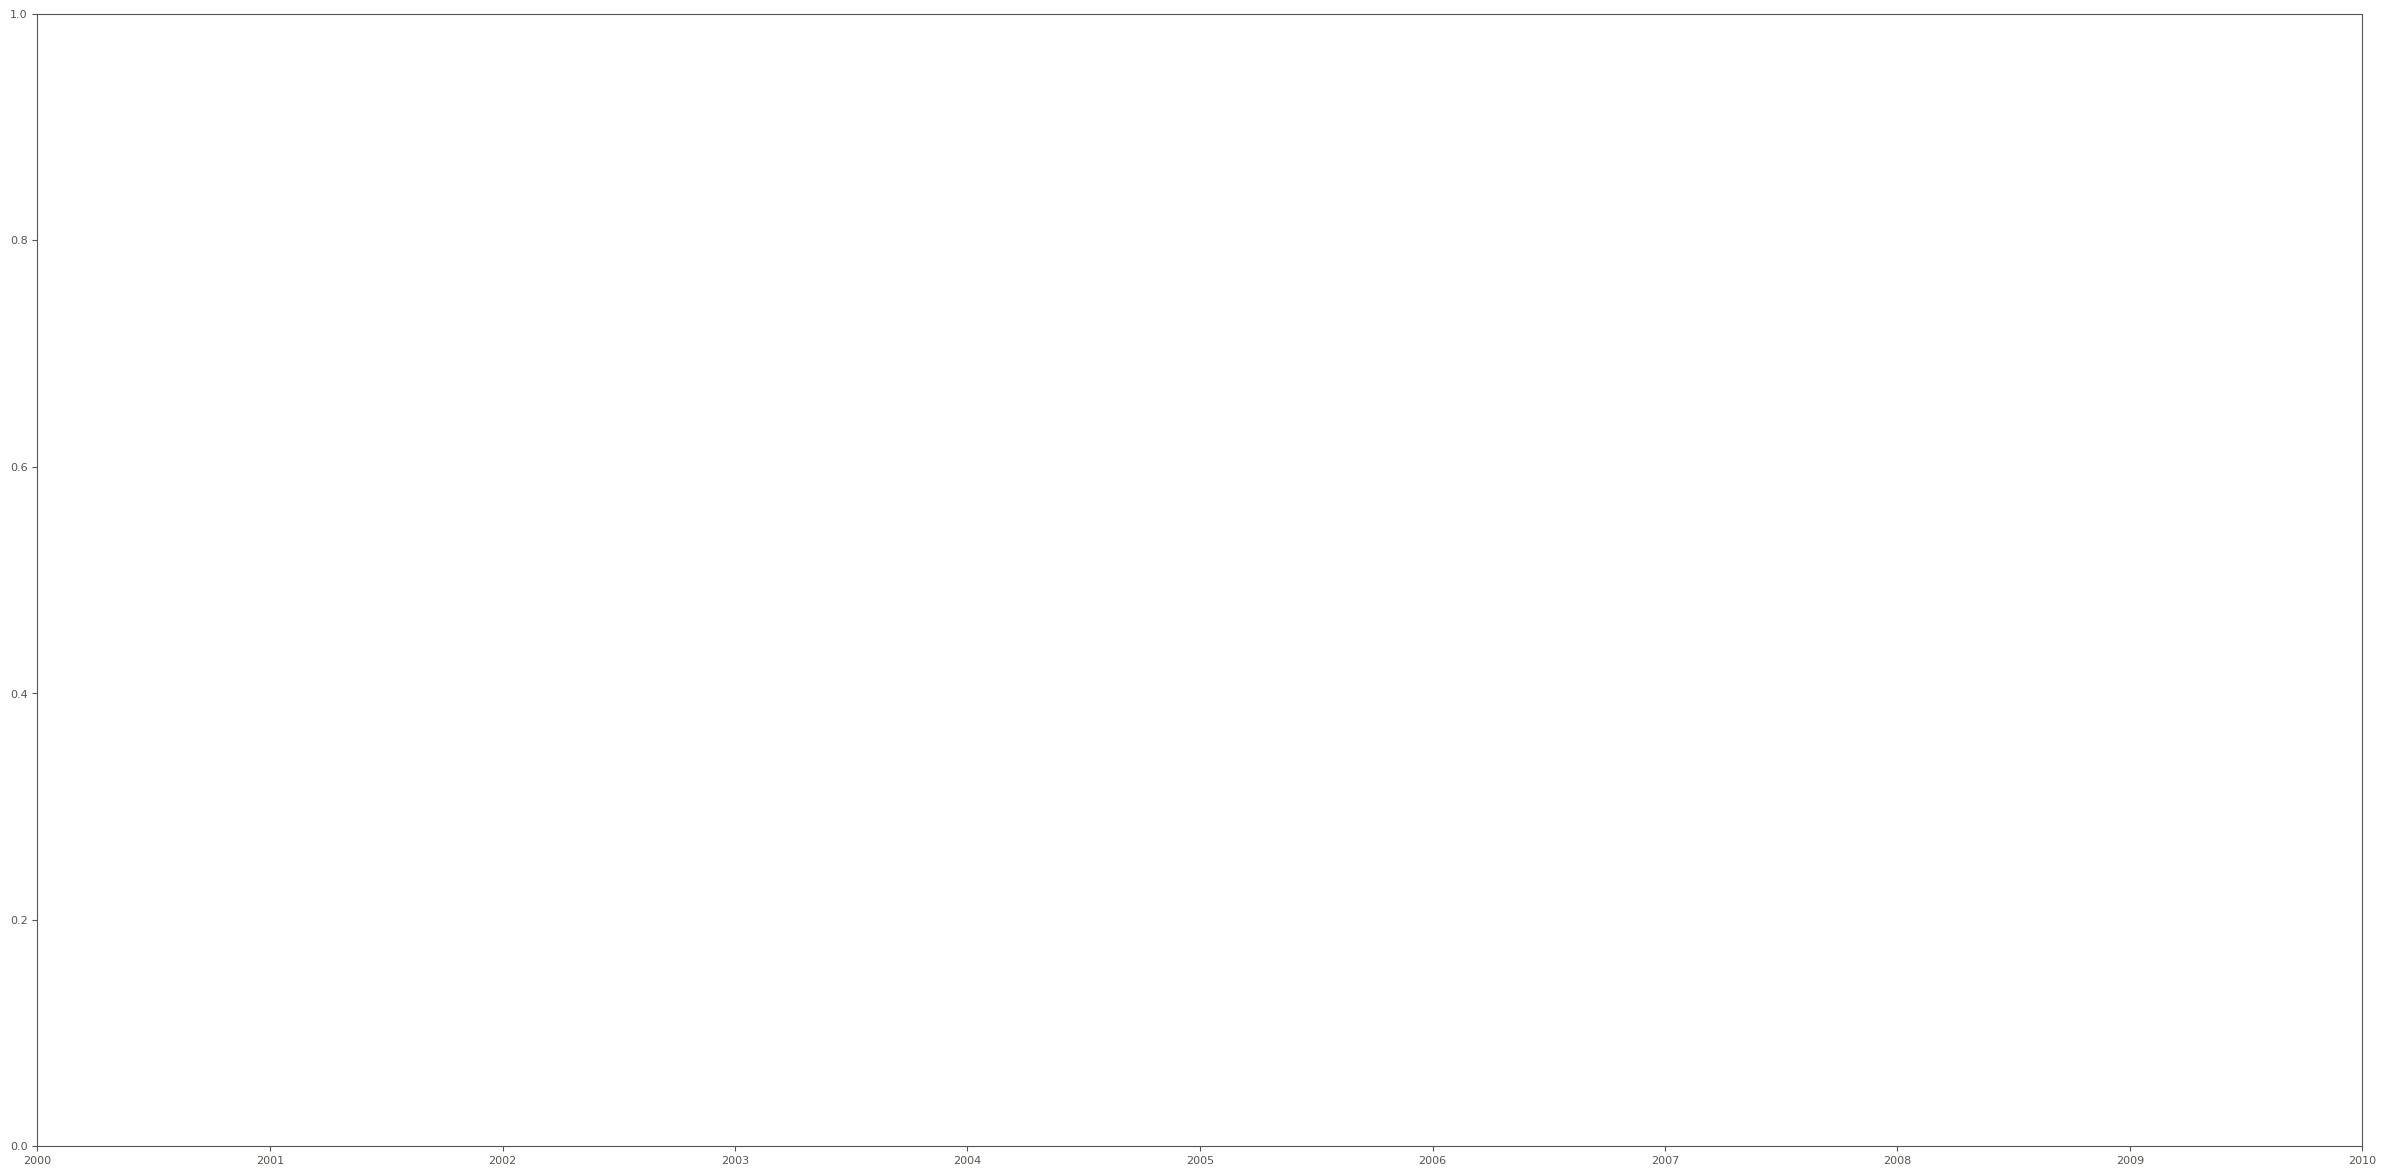

In [ ]:
# Investigate the sub result when document check failure occurs. Plot against the document failure rate, as these
#sub results are specified when failure of the document check occurs

rejected = df['sub_result'] == 'rejected' 
caution = df['sub_result'] == "caution"
suspected = df['sub_result'] == 'suspected'
doc_failure = df["result_doc"] != "clear"

plot_ma([doc_failure,rejected,caution,suspected],['Document Failure Rate','Rejected','Caution','Suspected'],'Document Failure Sub-result')
